In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [6]:
train=pd.read_csv('./train.csv', header=None)  #要標示沒有header，否則會少一個row
train.head()
train.shape

(1000, 40)

In [7]:
test=pd.read_csv('./test.csv', header=None)
test.head()
test.shape

(9000, 40)

In [8]:
trainLabels=pd.read_csv('./trainLabels.csv', header=None)
trainLabels.head()

,0
0,1
1,0
2,0
3,1
4,0


In [5]:
train.describe()

,0.29940251144353242,-1.2266241875260637,1.4984250500215328,-1.1761503610375272,5.2898525545597037,0.20829711393323402,2.4044983672405826,1.5945062220589785,-0.051608163273514231,0.66323431039687908,...,-0.85046544625016463,-0.62298999638261954,-1.8330573433160038,0.29302438506869571,3.5526813410266507,0.71761099417552265,3.3059719748508889,-2.7155588147154619,-2.6824085866346223,0.10105047232890663
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.025322,-0.023323,-0.025612,-0.001096,1.088127,-0.006465,0.495433,-0.039517,0.026469,-0.004264,...,0.031533,0.023598,-0.541199,-0.011913,-0.487548,0.032686,0.564443,0.009574,-0.890867,0.609960
std,1.008750,1.016094,0.978412,0.970349,4.539161,0.989601,2.119020,2.232776,1.001562,1.013808,...,1.011767,1.001668,2.240688,1.022922,2.118491,1.007316,2.227304,0.994404,2.022240,2.046400
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.670358,-0.690859,-0.700048,-0.616548,-1.805683,-0.733114,-0.839542,-1.607010,-0.680114,-0.682246,...,-0.659295,-0.696257,-2.123069,-0.664966,-1.880040,-0.643513,-1.060154,-0.689890,-2.214672,-0.565156
50%,0.023121,-0.031181,0.008037,0.003735,0.858932,0.025803,0.571475,0.017761,0.022855,-0.037531,...,0.049792,0.050187,-0.568168,-0.028179,-0.493701,0.036975,0.453544,0.038464,-0.853259,0.780175
75%,0.762980,0.683464,0.657948,0.640968,3.836911,0.671494,1.912284,1.436715,0.741949,0.666416,...,0.747815,0.700093,0.940334,0.651692,0.997741,0.690139,2.120006,0.693603,0.390982,1.994308
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [9]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,...,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,0.011814,0.004261,-0.001708,0.008614,1.262429,0.006003,0.480585,-0.017228,0.006883,-0.006664,...,-0.018914,0.007282,-0.476895,0.016175,-0.508713,-0.002295,0.451234,-0.002042,-1.003258,0.539873
std,1.009514,1.011432,0.996685,0.989010,4.527492,0.999623,2.102394,2.204673,0.989207,0.991570,...,1.003450,1.003326,2.202519,1.015779,2.097448,1.008415,2.187677,1.000152,1.979629,2.011646
min,-3.568633,-4.238067,-3.587473,-3.646144,-17.296514,-3.500646,-9.157707,-7.867021,-4.037177,-3.666707,...,-4.545617,-3.914329,-8.510309,-4.702577,-8.860839,-3.579675,-9.034930,-3.820679,-8.174851,-7.945400
25%,-0.669886,-0.678792,-0.665240,-0.662560,-1.669099,-0.688766,-0.894049,-1.521762,-0.654169,-0.665439,...,-0.689220,-0.664532,-1.986040,-0.673810,-1.908190,-0.689363,-1.071005,-0.667359,-2.293291,-0.717376
50%,0.006104,0.010758,0.007384,0.009027,1.123982,0.011476,0.534536,-0.021020,-0.006291,-0.005408,...,-0.033990,-0.003370,-0.459278,0.013170,-0.481508,-0.000858,0.419585,-0.003255,-1.004007,0.637040
75%,0.703350,0.684755,0.658111,0.683506,4.002391,0.690966,1.890960,1.460165,0.676678,0.654349,...,0.655757,0.682167,1.026158,0.691832,0.957351,0.666330,1.938350,0.667539,0.321595,1.897324
max,3.843549,3.538868,3.716102,3.667817,20.551947,4.565496,7.882210,7.391208,3.706671,3.322649,...,3.624639,4.251316,8.598575,4.157051,6.851583,3.911722,8.624332,3.860112,7.125848,9.464492


In [10]:
trainLabels.describe()

,0
count,1000.00000
mean,0.51000
std,0.50015
min,0.00000
25%,0.00000
50%,1.00000
75%,1.00000
max,1.00000


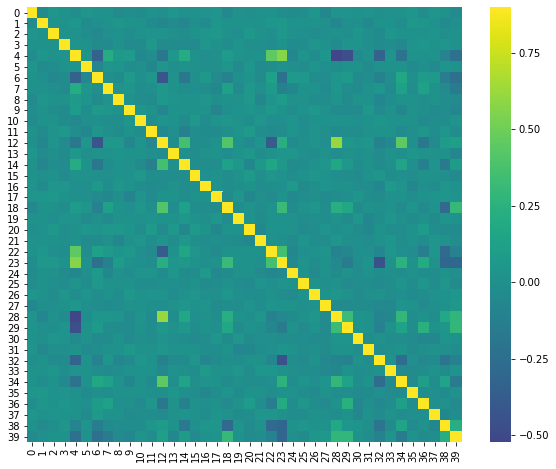

In [11]:
trainCorr=train.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(trainCorr, vmax=0.9, square=True, center=0, cmap='viridis')

In [12]:
def RFC(train, trainLabels, test, maxDepth, estimator):
    x_train, x_test, y_train, y_test=train_test_split(train, trainLabels, test_size=0.2, random_state=42)
    rfc=RandomForestClassifier(max_depth=maxDepth, n_estimators=estimator) #n_estimators:決策樹的數量
    rfc.fit(x_train, y_train)
    y_pred=rfc.predict(x_test)
    print('Accuracy_score:{accScore}, maxDepth={maxDepth}, n_estimators={estimator}'.format(accScore=accuracy_score(y_test, y_pred), maxDepth=maxDepth, estimator=estimator))
    return rfc
    
#RFC(train, trainLabels, test, 6, 2000)  #0.82
#RFC(train, trainLabels, test, 6, 3)     #0.725
model=RFC(train, trainLabels, test, 6, 5000)  #0.825
#RFC(train, trainLabels, test, 3, 2000)  #0.82
#RFC(train, trainLabels, test, 12, 2000) #0.825

C:\Users\A60104\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy_score:0.87, maxDepth=6, n_estimators=5000


In [13]:
preditct=model.predict(test)
pd_preditct=pd.DataFrame(columns=['Id', 'Solution'])
pd_preditct['Solution']=preditct
pd_preditct['Id']=np.arange(1, pd_preditct.shape[0]+1)
print(pd_preditct)

        Id  Solution
0        1         1
1        2         0
2        3         0
3        4         0
4        5         0
5        6         0
6        7         0
7        8         1
8        9         0
9       10         0
10      11         1
11      12         1
12      13         1
13      14         0
14      15         0
15      16         1
16      17         0
17      18         1
18      19         1
19      20         1
20      21         0
21      22         1
22      23         0
23      24         0
24      25         1
25      26         1
26      27         1
27      28         0
28      29         1
29      30         0
...    ...       ...
8970  8971         1
8971  8972         0
8972  8973         1
8973  8974         1
8974  8975         0
8975  8976         1
8976  8977         0
8977  8978         1
8978  8979         1
8979  8980         1
8980  8981         1
8981  8982         1
8982  8983         1
8983  8984         0
8984  8985         0
8985  8986   

In [14]:
pd_preditct.to_csv('output.csv', index=False)

Day_048_HW
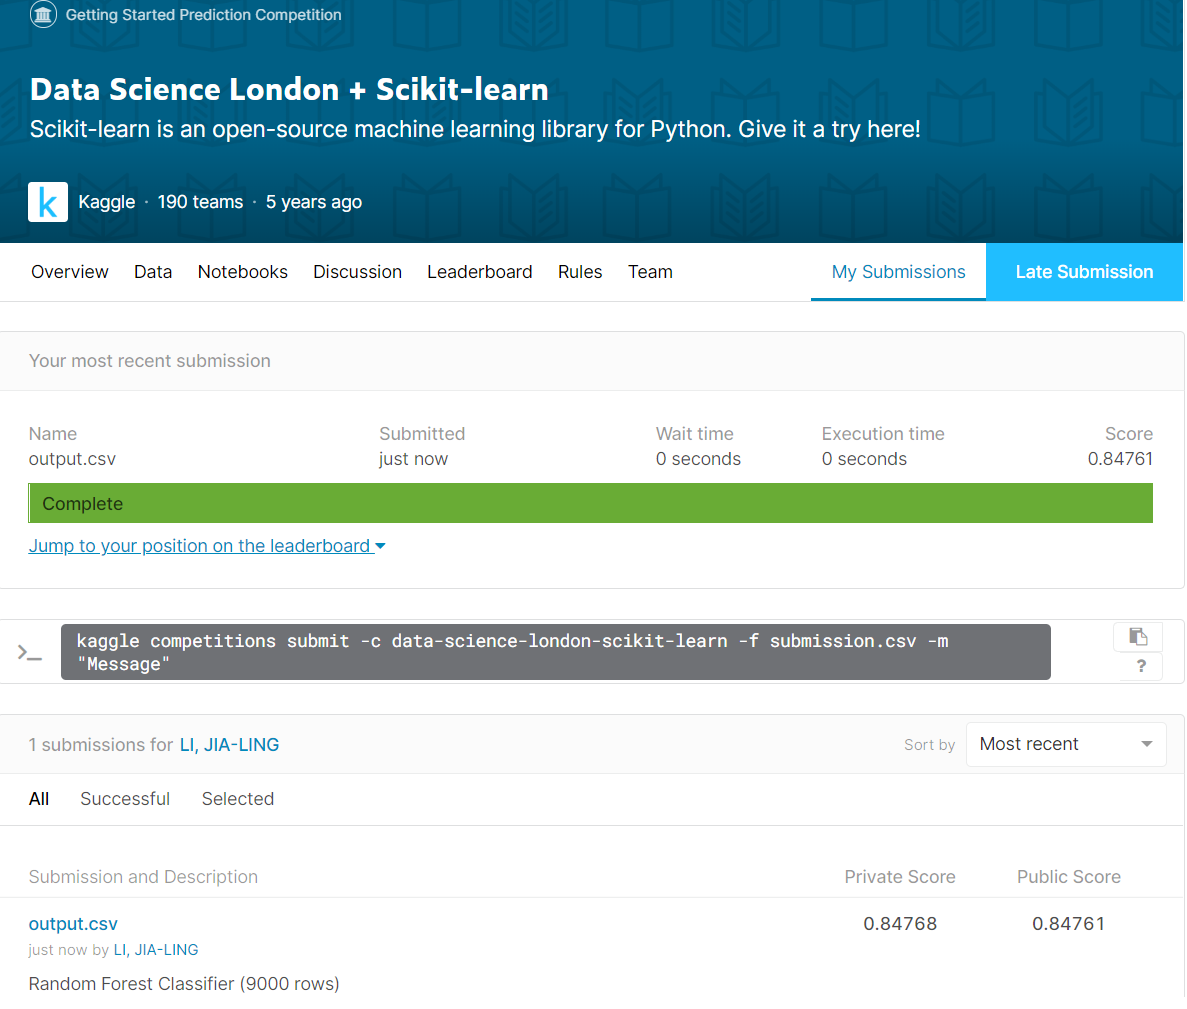